<a href="https://colab.research.google.com/github/eshalalam/turbo-human/blob/main/Carbon_Emissions_(B)_Research_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, model_selection, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.feature_selection import SelectKBest

In [30]:
df = pd.read_csv('/content/SupplyChainGHGEmissionFactors_v1.3.0_NAICS_CO2e_USD2022 (2) (1).csv')

In [4]:
df.head()

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
0,111110,Soybean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,1111A0
1,111120,Oilseed (except Soybean) Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,1111A0
2,111130,Dry Pea and Bean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0
3,111140,Wheat Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0
4,111150,Corn Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   2017 NAICS Code                                1016 non-null   int64  
 1   2017 NAICS Title                               1016 non-null   object 
 2   GHG                                            1016 non-null   object 
 3   Unit                                           1016 non-null   object 
 4   Supply Chain Emission Factors without Margins  1016 non-null   float64
 5   Margins of Supply Chain Emission Factors       1016 non-null   float64
 6   Supply Chain Emission Factors with Margins     1016 non-null   float64
 7   Reference USEEIO Code                          1016 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 63.6+ KB


In [6]:
df.describe()

,2017 NAICS Code,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins
count,1016.000000,1016.000000,1016.000000,1016.000000
mean,424917.376969,0.264994,0.016945,0.281898
std,164942.113495,0.314768,0.023367,0.321417
min,111110.000000,0.026000,0.000000,0.029000
25%,325588.250000,0.103000,0.000000,0.108000
50%,423700.000000,0.159000,0.000000,0.173000
75%,532111.250000,0.302250,0.030250,0.329250
max,813990.000000,3.846000,0.125000,3.924000


In [7]:
df.isnull().sum()

,0
2017 NAICS Code,0
2017 NAICS Title,0
GHG,0
Unit,0
Supply Chain Emission Factors without Margins,0
Margins of Supply Chain Emission Factors,0
Supply Chain Emission Factors with Margins,0
Reference USEEIO Code,0


In [8]:
df.value_counts()

,,,,,,,,count
2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code,
813990,"Other Similar Organizations (except Business, Professional, Labor, and Political Organizations)",All GHGs,"kg CO2e/2022 USD, purchaser price",0.128,0.000,0.128,813B00,1
111110,Soybean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,1111A0,1
111120,Oilseed (except Soybean) Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,1111A0,1
111130,Dry Pea and Bean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0,1
111140,Wheat Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0,1
...,...,...,...,...,...,...,...,...
111331,Apple Orchards,All GHGs,"kg CO2e/2022 USD, purchaser price",0.429,0.059,0.488,111300,1
111320,Citrus (except Orange) Groves,All GHGs,"kg CO2e/2022 USD, purchaser price",0.429,0.059,0.488,111300,1
111310,Orange Groves,All GHGs,"kg CO2e/2022 USD, purchaser price",0.429,0.059,0.488,111300,1


Research Question:
Which industries have the highest and lowest carbon emissions per dollar of economic activity, and what patterns can be observed among them?

In [9]:
# Checking for duplicates
print(df.duplicated().sum())


0


In [31]:
# Renaming column
df = df.rename(columns={
    "Supply Chain Emission Factors with Margins": "Emissions_per_USD",
    "2017 NAICS Code": "NAICS_Code",
    "2017 NAICS Title": "Industry"
})

In [11]:
# Dropping unnecessary columns
columns_to_keep = ["NAICS_Code", "Industry", "Emissions_per_USD"]
df = df[columns_to_keep]
print(df.head())

   NAICS_Code                          Industry  Emissions_per_USD
0      111110                   Soybean Farming              0.532
1      111120  Oilseed (except Soybean) Farming              0.532
2      111130          Dry Pea and Bean Farming              0.848
3      111140                     Wheat Farming              0.848
4      111150                      Corn Farming              0.848


In [ ]:
# Top 10 highest and lowest emitters
highest_emissions = df.sort_values("Emissions_per_USD", ascending=False).head(10)
lowest_emissions = df.sort_values("Emissions_per_USD", ascending=True).head(10)

print("\nTop 10 Highest-Emitting Industries:")
print(highest_emissions[["Industry", "Emissions_per_USD"]])

print("\nTop 10 Lowest-Emitting Industries:")
print(lowest_emissions[["Industry", "Emissions_per_USD"]])



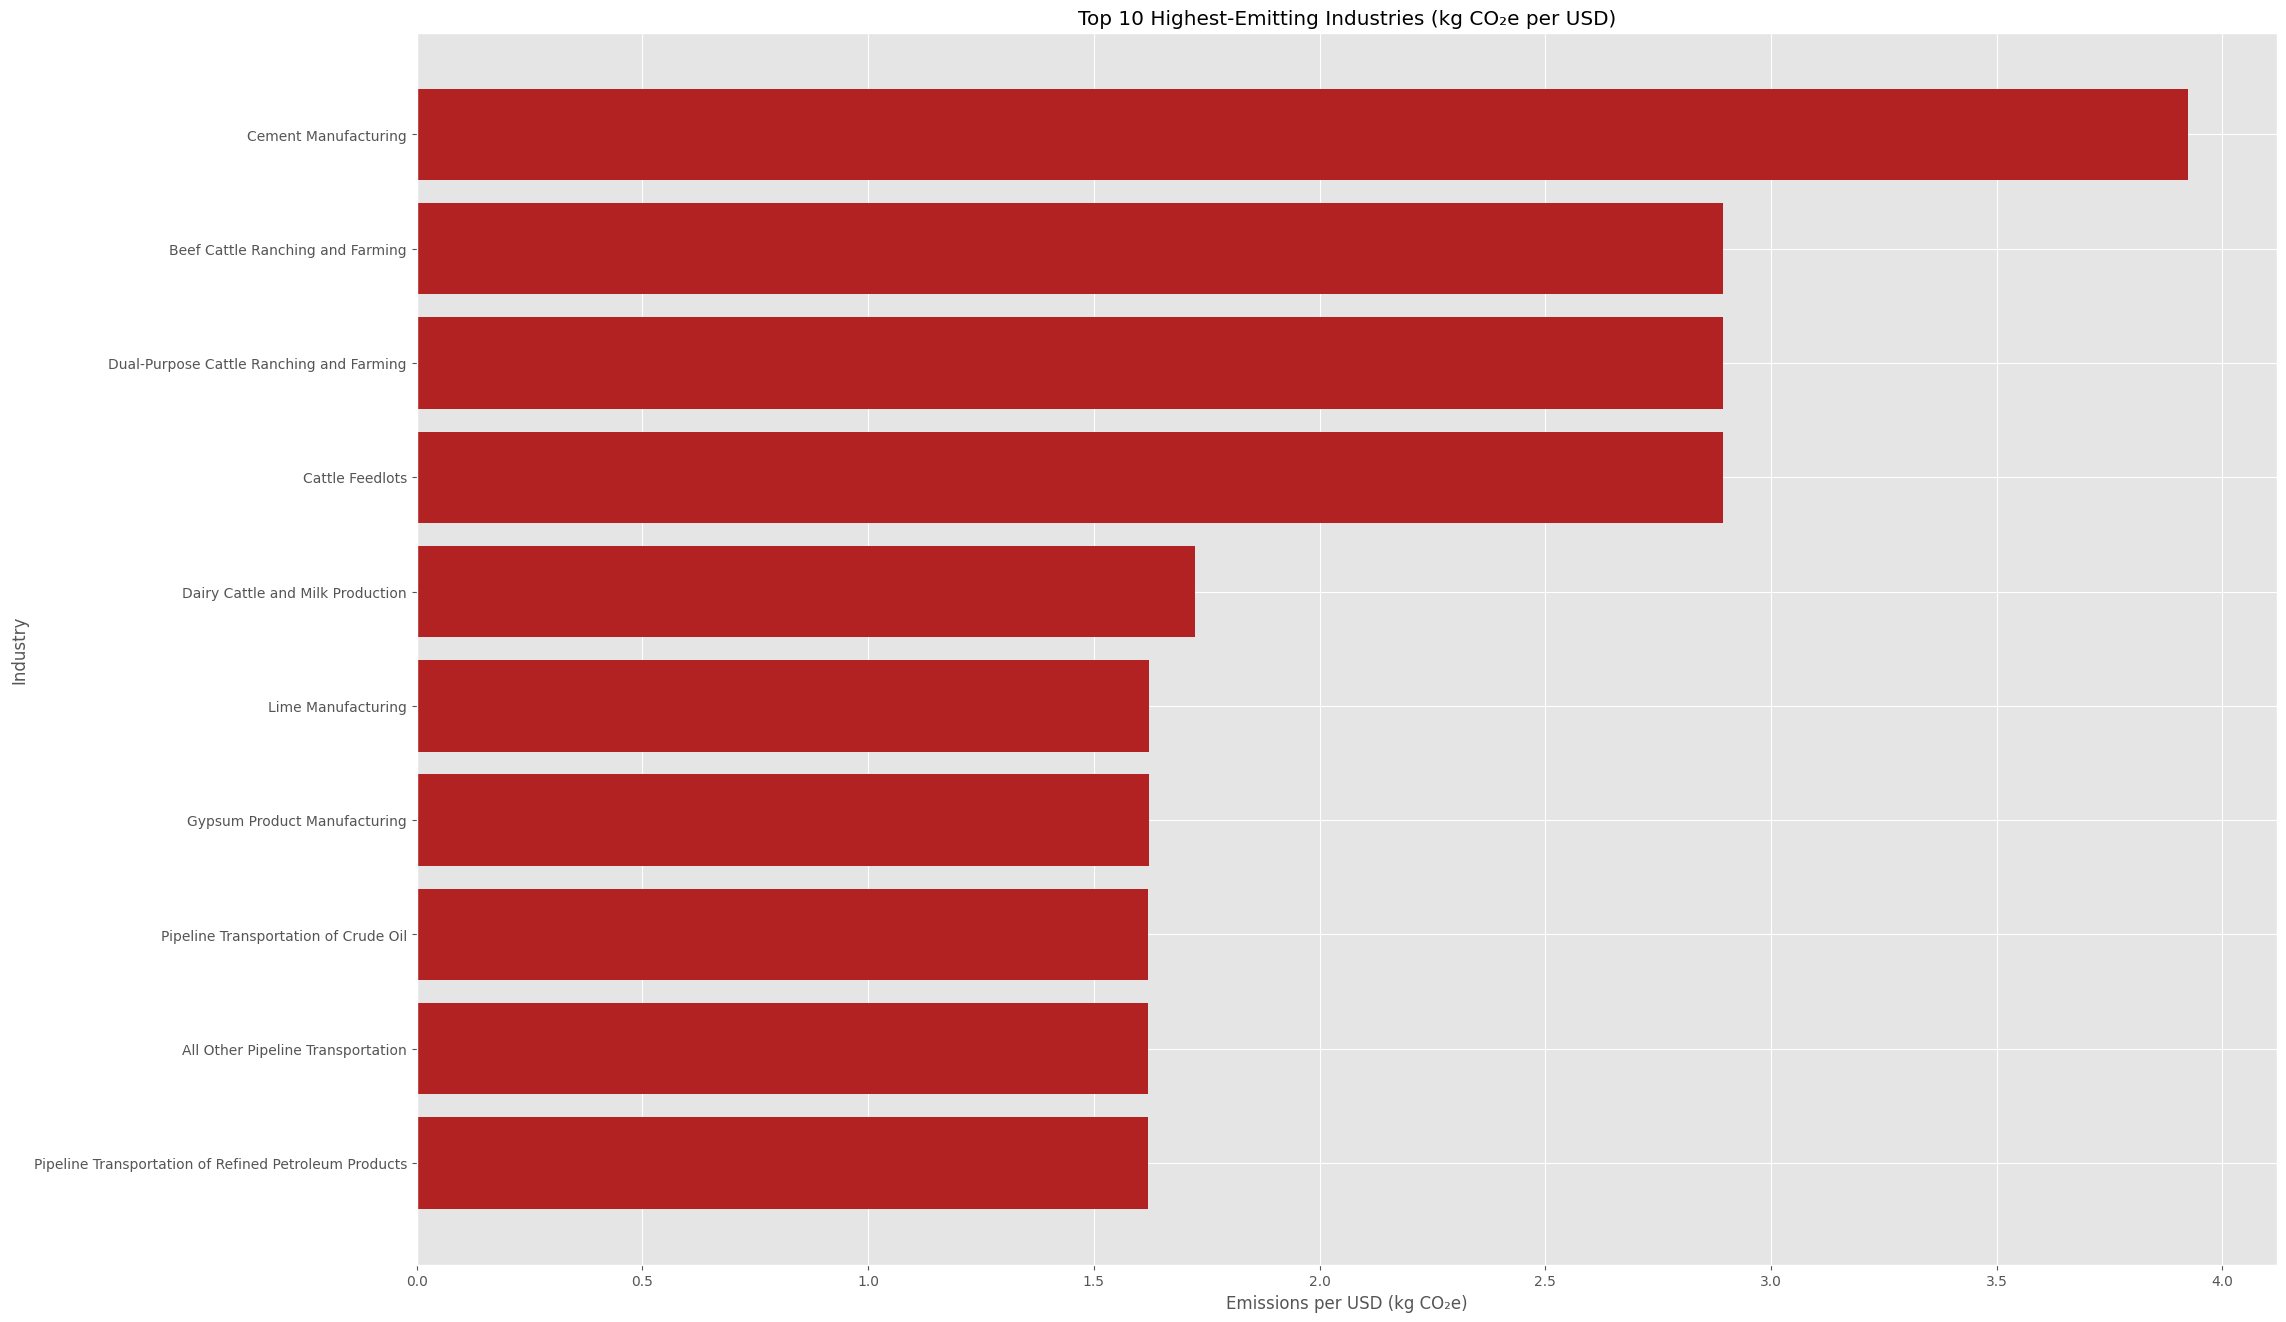

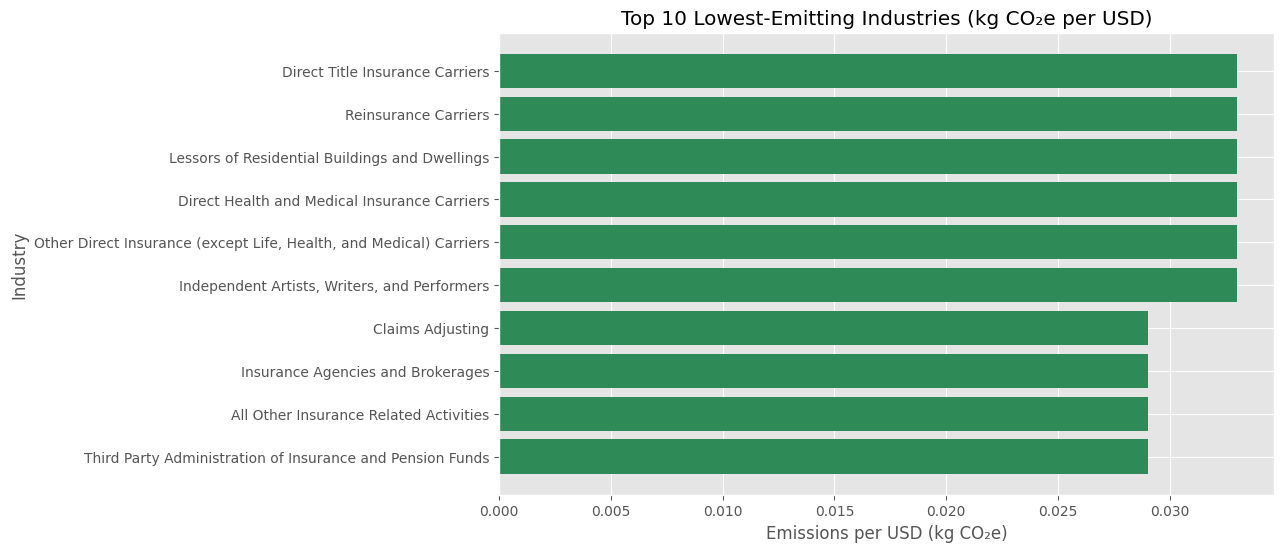

In [14]:
plt.style.use('ggplot')

# Plotting Top 10 Highest Emitters
plt.figure(figsize=(24, 16))
plt.barh(highest_emissions["Industry"], highest_emissions["Emissions_per_USD"], color='firebrick')
plt.title("Top 10 Highest-Emitting Industries (kg CO₂e per USD)")
plt.xlabel("Emissions per USD (kg CO₂e)")
plt.ylabel("Industry")
plt.gca().invert_yaxis()  # Highest at top
plt.show()

# Plotting Top 10 Lowest Emitters
plt.figure(figsize=(10, 6))
plt.barh(lowest_emissions["Industry"], lowest_emissions["Emissions_per_USD"], color='seagreen')
plt.title("Top 10 Lowest-Emitting Industries (kg CO₂e per USD)")
plt.xlabel("Emissions per USD (kg CO₂e)")
plt.ylabel("Industry")
plt.show()

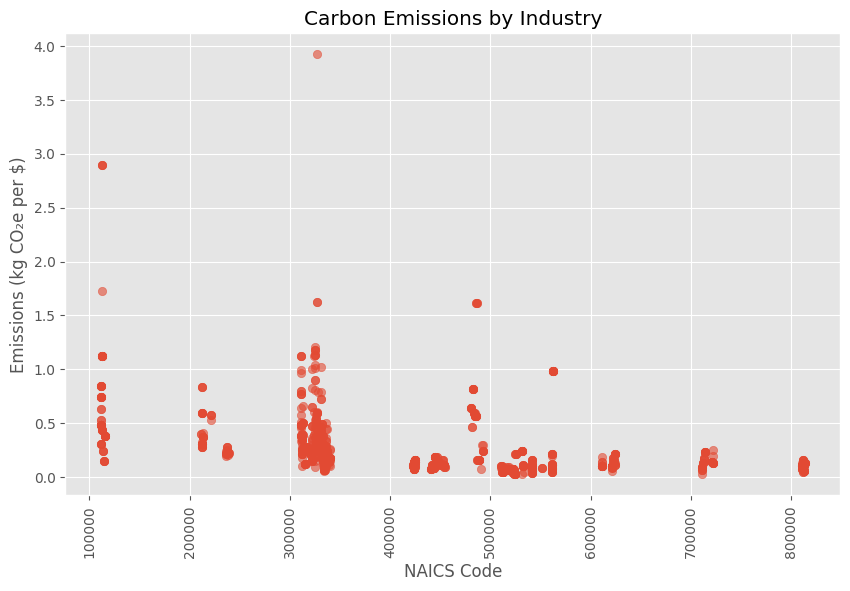

In [17]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x=df["NAICS_Code"], y=df["Emissions_per_USD"], alpha=0.6)
plt.title("Carbon Emissions by Industry")
plt.xlabel("NAICS Code")
plt.ylabel("Emissions (kg CO₂e per $)")
plt.xticks(rotation=90)
plt.show()

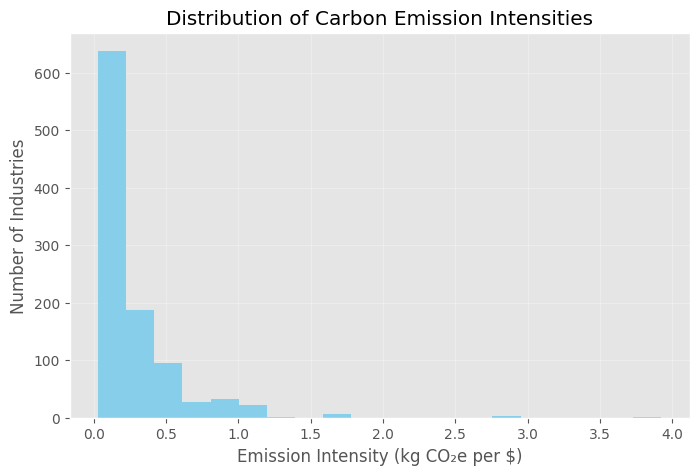

In [16]:
# histogram with Emission Factors with Margins
plt.figure(figsize=(8, 5))
emission_values1 = df["Emissions_per_USD"]
plt.hist(emission_values1, bins=20, color='skyblue')

plt.title("Distribution of Carbon Emission Intensities")
plt.xlabel("Emission Intensity (kg CO₂e per $)")
plt.ylabel("Number of Industries")
plt.grid(True, alpha=0.3)
plt.show()

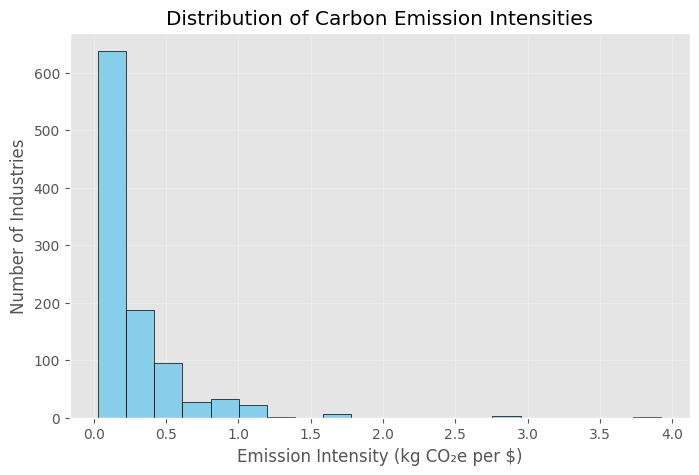

In [18]:
# histogram with Emission Factors without Margins
plt.figure(figsize=(8, 5))
emission_values2 = df["Emissions_per_USD"]
plt.hist(emission_values2, bins=20, color='skyblue', edgecolor='black')

plt.title("Distribution of Carbon Emission Intensities")
plt.xlabel("Emission Intensity (kg CO₂e per $)")
plt.ylabel("Number of Industries")
plt.grid(True, alpha=0.3)
plt.show()

<Figure size 1000x600 with 0 Axes>

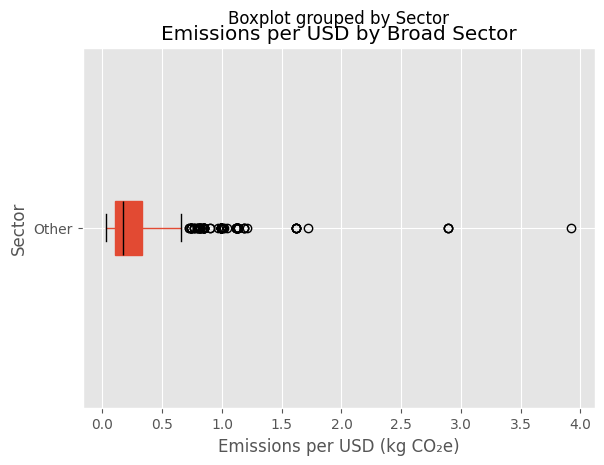

In [19]:
# Sectors based on NAICS codes
def categorize_sector(naics_code):
    code = int(naics_code)
    if 111 <= code <= 112: return "Agriculture"
    elif 311 <= code <= 339: return "Manufacturing"
    elif 481 <= code <= 486: return "Transportation"
    else: return "Other"

df["Sector"] = df["NAICS_Code"].apply(categorize_sector)

# Box plot by sector
plt.figure(figsize=(10, 6))
df.boxplot(column="Emissions_per_USD", by="Sector", vert=False, patch_artist=True, medianprops={'color': 'black'})
plt.title("Emissions per USD by Broad Sector")
plt.xlabel("Emissions per USD (kg CO₂e)")
plt.ylabel("Sector")
plt.show()

In [20]:
# Categorical to Numerical
df_numeric = pd.get_dummies(df, columns=["Industry"], drop_first=True)

# Features, X and target, Y
X = df_numeric.drop(columns=["Emissions_per_USD"])  # Features
y = df_numeric["Emissions_per_USD"]                 # Target

# Converting the 'Sector' column to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Sector'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

from sklearn.neighbors import KNeighborsRegressor

model_unscaled = KNeighborsRegressor(n_neighbors=5)

model_unscaled.fit(X_train, y_train)

pred_unscaled = model_unscaled.predict(X_test)
print(mean_squared_error(y_test, pred_unscaled))

0.019299746470588235


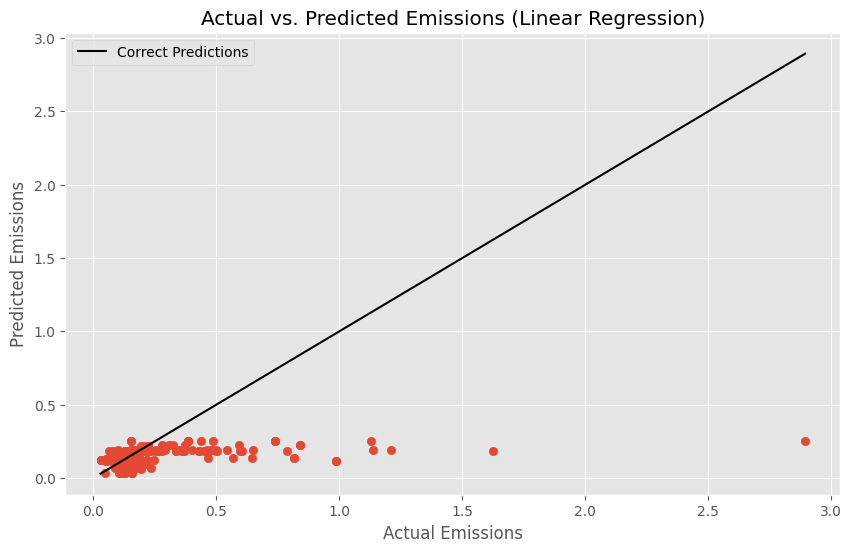

In [21]:
from sklearn.linear_model import LinearRegression

# linear regression
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label='Correct Predictions')
plt.xlabel("Actual Emissions")
plt.ylabel("Predicted Emissions")
plt.title("Actual vs. Predicted Emissions (Linear Regression)")
plt.legend()
plt.show()

In [22]:
# Summary table
summary_table = pd.concat([highest_emissions.head(5), lowest_emissions.head(5)], axis=0)

print("\nSummary Table: Highest and Lowest Emitters")
print(summary_table[["Industry", "Emissions_per_USD"]])

# Observations
print("\nKey Observations:")
print("- Highest emitters: Cement manufacturing, cattle farming, and coal mining dominate.")
print("- Lowest emitters: Service sectors (e.g., software, consulting) have minimal emissions.")
print("- Manufacturing and agriculture are the most emission-intensive sectors.")


Summary Table: Highest and Lowest Emitters
                                              Industry  Emissions_per_USD
285                               Cement Manufacturing              3.924
30                    Beef Cattle Ranching and Farming              2.893
33            Dual-Purpose Cattle Ranching and Farming              2.893
31                                     Cattle Feedlots              2.893
32                    Dairy Cattle and Milk Production              1.724
744  Third Party Administration of Insurance and Pe...              0.029
745             All Other Insurance Related Activities              0.029
742                  Insurance Agencies and Brokerages              0.029
743                                   Claims Adjusting              0.029
938       Independent Artists, Writers, and Performers              0.033

Key Observations:
- Highest emitters: Cement manufacturing, cattle farming, and coal mining dominate.
- Lowest emitters: Service sectors (e.g

In [23]:
highest_emissions1 = df.sort_values("Emissions_per_USD", ascending=False).head(3)
lowest_emissions2 = df.sort_values("Emissions_per_USD", ascending=True).head(3)

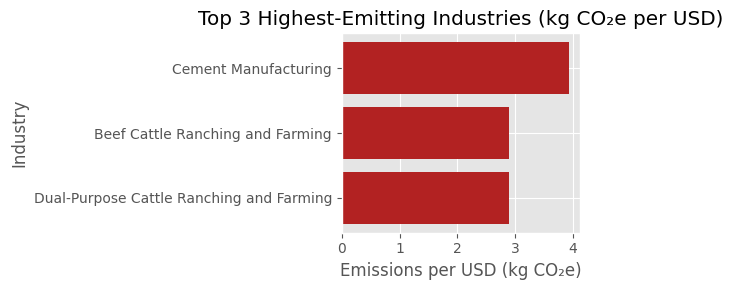

In [24]:
plt.style.use('ggplot')

# Top 3 Highest Emitters
plt.figure(figsize=(6, 3))
plt.barh(highest_emissions1["Industry"], highest_emissions1["Emissions_per_USD"], color='firebrick')
plt.title("Top 3 Highest-Emitting Industries (kg CO₂e per USD)")
plt.xlabel("Emissions per USD (kg CO₂e)")
plt.ylabel("Industry")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

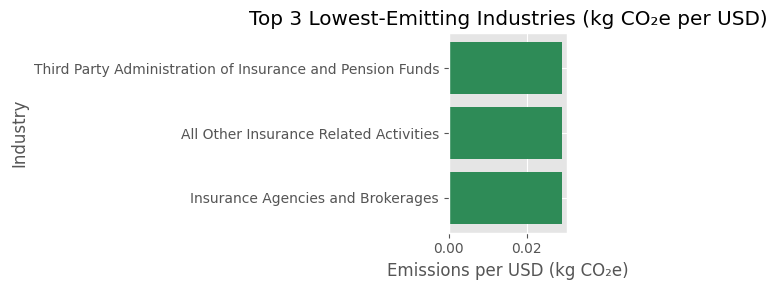

In [25]:
plt.style.use('ggplot')

# Top 3 Highest Emitters
plt.figure(figsize=(6, 3))
plt.barh(lowest_emissions2["Industry"], lowest_emissions2["Emissions_per_USD"], color='seagreen')
plt.title("Top 3 Lowest-Emitting Industries (kg CO₂e per USD)")
plt.xlabel("Emissions per USD (kg CO₂e)")
plt.ylabel("Industry")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Null Hypothesis (H₀):
"There is no difference in mean CO₂ emissions per dollar between Cement and Insurance industries."

Alternative Hypothesis (H₁):
"Cement manufacturing has significantly higher mean emissions per dollar than Insurance services."

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:4008: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Streaming output truncated to the last 5000 lines.
                                                                                                    Steel Wire Drawing                                                                  Toy and Hobby Goods and Supplies Merchant Wholesalers   -0.252   nan   nan   nan  False
                                                                                                    Steel Wire Drawing                                                                                Translation and Interpretation Services    -0.28   nan   nan   nan  False
                                                                                                    Steel Wire Drawing                                      Transportation Equipment and Supplies (except Motor Vehicle) Merchant Wholesalers   -0.245   nan   nan   nan  False
                                                                                                    Steel Wire Drawing               

ValueError: Axis limits cannot be NaN or Inf

<Figure size 1000x400 with 0 Axes>

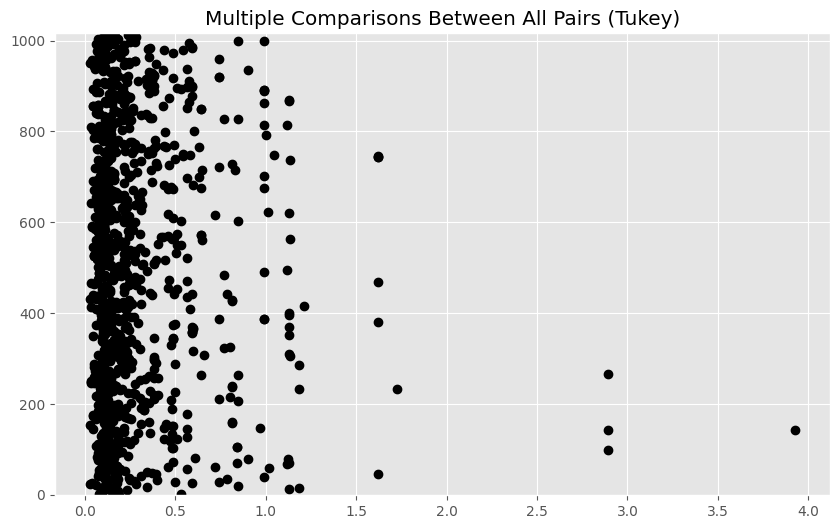

In [26]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway, ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import matplotlib.pyplot as plt

# Multicomparisons
mc = MultiComparison(df['Emissions_per_USD'], df['Industry'])
tukey_results = mc.tukeyhsd()
print("\n Tukey HSD Pairwise Comparisons ")
print(tukey_results.summary())

# Plot
plt.figure(figsize=(10, 4))
tukey_results.plot_simultaneous()
plt.title('Multiple Comparisons of Means')
plt.show()

In [ ]:
# t-Test (Cement vs. Insurance)
print("\n t-TEST: CEMENT vs. INSURANCE ")
t_stat, p_value = ttest_ind(df[df['Industry'] == 'Cement']['Emissions_per_USD'], df[df['Industry'] == 'Insurance']['Emissions_per_USD'], equal_var=False )
print(f"t-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")
if p_value < 0.5 :
    print(f"\nConclusion: Reject H₀ (p = {p_value:.4f})")
    print("Cement has significantly higher emissions per dollar than Insurance")
else:
    print(f"\nConclusion: Fail to reject H₀ (p = {p_value:.4f})")
    print("No evidence that Cement emissions are higher than Insurance")

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Industry', y='Emissions_per_USD', data=df[df['Industry'].isin(['Cement', 'Insurance'])], palette=['#e74c3c', '#2ecc71'])
plt.title("Emissions per USD: Cement vs. Insurance", fontsize=14)
plt.ylabel("kg CO₂ per $", fontsize=12)
plt.xlabel("Industry", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
